# Shaker table experimental datasets

This notebook provides information about acceleration datasets collected from a scale model of 12-storey reinforced concrete frame building subjected to simulated earthquake loading. This data was supplied by Professor Yang from Chongqing University.

Two datasets collected during the simulated earthquake testing are available:

- **Frequency transfer functions** of the measured acceleration response collected at various stages throughout the testing regime.
- **Acceleration data collected from the damaged structure** subjected to simulated earthquake loading of various magnitudes.


## Experimental test structure
Acceleration data was collected from a 1/10 scale model of 12-storey reinforced concrete frame building subjected to simulated earthquake loading via a shaker table. A photo and a schematic of the structure are shown below.<br>

<div><center>
<img src="_static/RC_structure_01.PNG" width="45%"/>
<img src="_static/RC_structure_02.PNG" width="40%"/>
</center></div>

The model was constructed from micro-concrete and galvanized iron wire. 

## Sensor network
Accelerometers were located as shown in the schematic below. Accelerometers with the prefix *A* record transverse acceleration, prefix *AY* accelerometers are used to measure longitudinal acceleration, prefix *AZ* accelerometers are used to measure vertical acceleration, and prefix *R* refers to accelerometers used to measure transverse base movement.

<div><center>
<img src="_static/RC_structure_03.PNG" width="60%"/>
</center></div>

## Simulated earthquake loading
A variety of seismic waveforms were used during the testing including the El Centro wave, Kobe wave and the Shanghai bedrock wave. 

The frequency transfer functions of the acceleration data from various stages of the testing were estimated through excitation of the structure with white noise.

## Data collection and experimental regime
Data was collected from the accelerometers as the frame model was subjected to a variety of characteristic earthquake excitations and white noise excitation via the shaking table. All data was sampled at 50Hz and is recorded in units of gravity (g). Tests were repeated with various peak excitation amplitudes to test the strength of the structure and track how damage propagates within the structure.


## Damage history 
There was extensive damage to the structure during the testing, primarily cracking between transverse floor slabs and column supports alongside cracking of the vertical columns at the lower storeys of the structure. This cracking is highlighted in the schematic below.

<div><center>
<img src="_static/RC_structure_04.PNG" width="60%"/>
</center></div>

No damage occured above the ninth storey of the structure.

Further details of where and when damaged occured are provided in the section on the frequency transfer function datasets.

### Further information
Further information about the experimental testing can be found in the documents linked below:

- [Original document (Simplified Chinese)](_static/Orig_RC_doc.pdf)
- [English language document](_static/Translated_RC_doc.pdf)



## Frequency transfer function data

The data presented in this section are frequency transfer functions of the acceleration data collected from the structure during white noise excitations at various stages during the experimental testing. Changes in these transfer functions indicate how the dynamic behaviour of the structure changes due to damage induced by the simulated earthquake loading. 

### What is a frequency transfer function?
Frequency transfer functions give the magnitude of the dynamic response at each frequency of excitation. A peak in the frequency response indicates a mode of vibration of the structure. By tracking how the the location and magnitude of these peaks change over time, the impact of damage on the structure's dynamic behaviour can be quantified. 


### Accessing the frequency transfer function data

Datasets containing frequency transfer functions of the dynamic response of the structure at various stages of the shaker table testing are linked below:

- [Frequency transfer functions for test condition 01](_static/TF_working_condition_01.csv) - CSV file containing accelerometer frequency transfer functions for undamaged structure.
- [Frequency transfer functions for test condition 07](_static/TF_working_condition_07.csv) - CSV file containing accelerometer frequency transfer functions for structure after 7 repetitions of simulated earthquake loading.
- [Frequency transfer functions for test condition 16](_static/TF_working_condition_16.csv) - CSV file containing accelerometer frequency transfer functions for structure after 16 repetitions of simulated earthquake loading
- [Frequency transfer functions for test condition 25](_static/TF_working_condition_25.csv) - CSV file containing accelerometer frequency transfer functions for structure after 25 repetitions of simulated earthquake loading
- [Frequency transfer functions for test condition 34](_static/TF_working_condition_34.csv) - CSV file containing accelerometer frequency transfer functions for structure after 34 repetitions of simulated earthquake loading
- [Frequency transfer functions for test condition 43](_static/TF_working_condition_43.csv) - CSV file containing accelerometer frequency transfer functions for structure after 43 repetitions of simulated earthquake loading
- [Frequency transfer functions for test condition 52](_static/TF_working_condition_52.csv) - CSV file containing accelerometer frequency transfer functions for structure after 52 repetitions of simulated earthquake loading
- [Frequency transfer functions for test condition 61](_static/TF_working_condition_61.csv) - CSV file containing accelerometer frequency transfer functions for structure after 61 repetitions of simulated earthquake loading

### Timeline of damage progression

Each repitition of the simulated earthquake loading is one test condition. The frequency transfer functions were recorded at regular intervals during the simulated earthquake loading.

Limited descriptions of the damage history of the structure at each test condition, as recorded during the testing, are provided in the table below.

| Test condition | Notes |
| --- | --- |
| 01 | Undamaged structure at start of testing regime. | 
| 07 | No visible cracking of structure. | 
| 16 | Vertical cracks present at ends of beams on 4th, 5th and 6th floors, parallel to x-direction. Crack width 0.08mm. | 
| 21 | Vertical bi-directional cracks present at ends of beams on 4th, 5th and 6th floors. Crack width 0.08mm at test condition 21, increasing with each subsequent test condition. | 
| 61 | Cracks at beam and column ends of 10th floor. Bi-drectional cracks at beam ends of 2nd to 8th floors. Damage most severe at 3rd to 6th floors, with crack width of 4mm, crushing of concrete and pull-out of reinforcement leading to the formation of plastic hinges. There is no visible cracking of the 10th to 12th floors of the structure.| 


### Loading the transfer function data
The data for each test condition is stored as a CSV file. 

We'll start by loading in some commonly used Python modules we need for processing and plotting the data.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Now let's load the data from the conference website. This data is stored as a CSV file. The code below loads and formats the data for test condition 01 (the undamaged structure).

In [29]:
url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/TF_working_condition_01.csv"

dat0 = pd.read_csv(url,index_col=0)

### Exploring the transfer function data
The data file is structured with the index column as the frequency, and with all other data stored as columns of the dataframe. The names of the index column and dataframe columns are printed below.

In [21]:
print(dat0.index.name)
print(dat0.columns)

Frequency [Hz]
Index(['A2', 'AY1', 'AY2', 'AY3', 'AY5', 'AY6', 'AY7', 'R1', 'R2', 'AZ2',
       'AZ4', 'AZ5', 'AZ6', 'AZ7', 'E11', 'E12', 'E13', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10'],
      dtype='object')


### Plotting the transfer function data
The block of code below plots the magnitude of the frequency transfer function for accelerometer 'AZ2' for test condition 01.

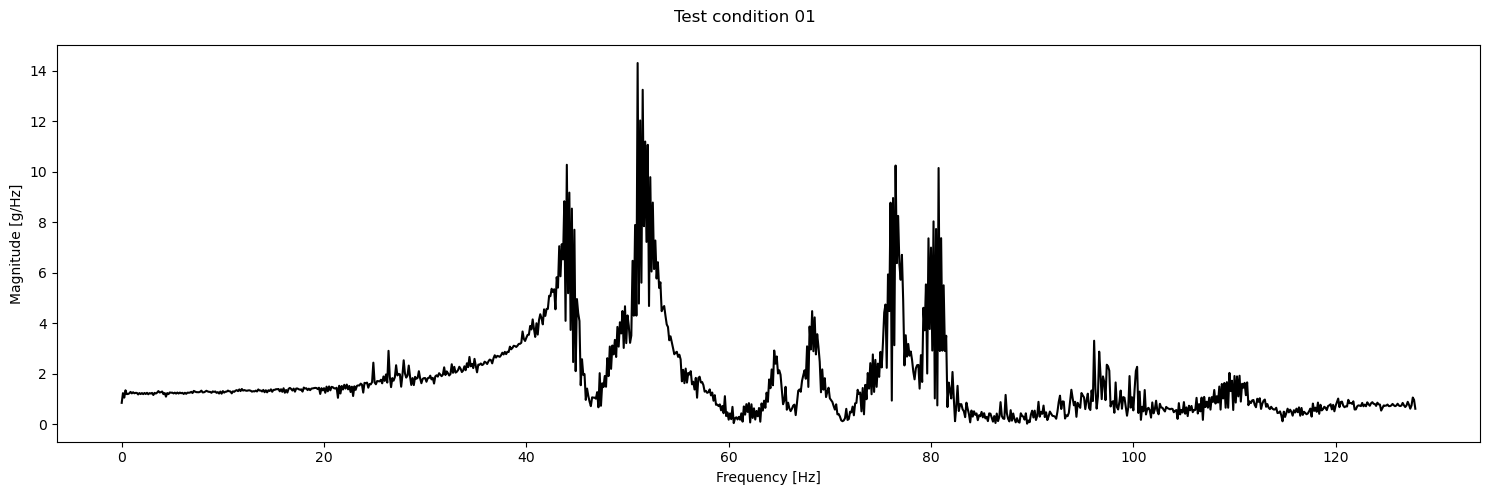

In [30]:
fg,ax = plt.subplots(figsize=(15,5))
ax.plot(dat0.index,dat0['AZ2'],'k')
ax.set_ylabel('Magnitude [g/Hz]')
ax.set_xlabel('Frequency [Hz]')
fg.suptitle('Test condition 01')
fg.tight_layout()

### Comparing transfer function from the damaged and undamaged structure
The block of code below compares the frequency transfer function of accelerometer 'AZ2' for test conditions 01 and 16, highlighting how the dynamic behaviour of the structure has changed due to the damage. We can see in the plot that the frequency at which peaks occur has decreased, likely due to a reduction in the stiffness of the frame due to cracking. Alongside this the peaks are broader and have lower magnitudes, likely due to increased damping of the structure due to friction occuring at the cracks.

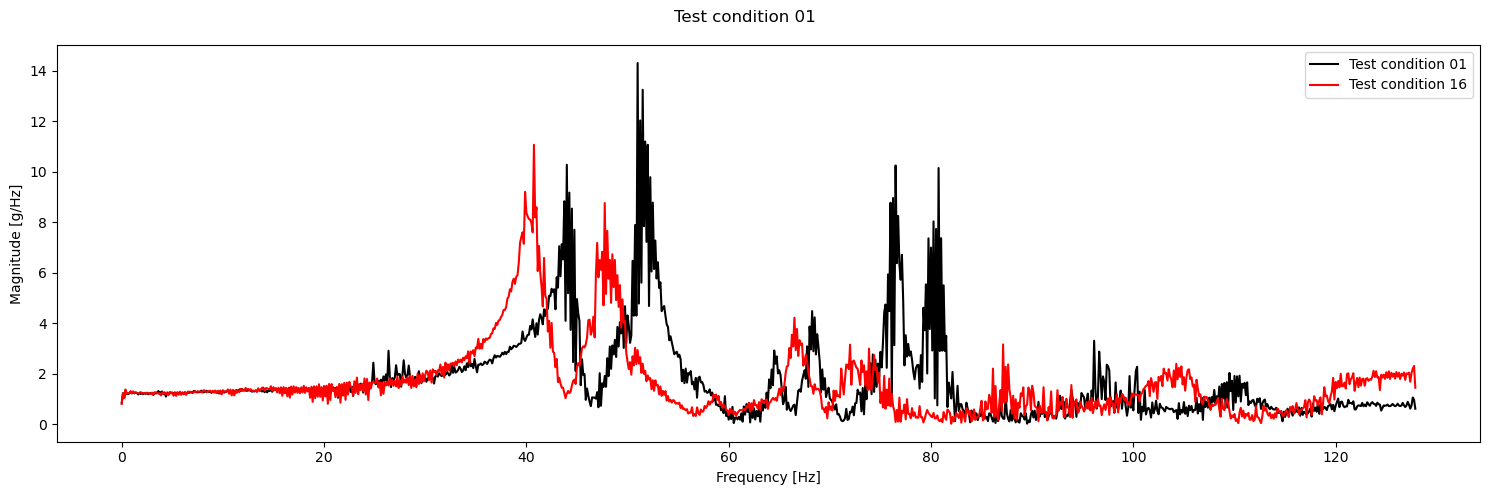

In [27]:
url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/TF_working_condition_16.csv"

dat16 = pd.read_csv(url,index_col=0)

fg,ax = plt.subplots(figsize=(15,5))

ax.plot(dat0.index,dat0['AZ2'],'k',label='Test condition 01')
ax.plot(dat16.index,dat16['AZ2'],'r',label='Test condition 16')
ax.set_ylabel('Magnitude [g/Hz]')
ax.set_xlabel('Frequency [Hz]')
ax.legend(loc=1)
fg.suptitle('Test condition 01')
fg.tight_layout()

## Acceleration data from damaged structure

The data presented in this section comes from the structure in the damaged state, after the full cycle of earthquake loadings. 

For this testing, the loading of the structure was repeated for a variety of *working conditions*, consecutive loadings of increasing magnitude. Working condition *e1* contains data from when the structure is excited with the base simulated earthquake regime. Each subsequent working condition increases the magnitude of the simulated excitation by a multiple of the base excitation. For example, working condition *e7* is data collected from the frame when subjected to an input excitation with a magnitude seven times larger than working condition *e1*.

The data from the damaged structure for the EDACABB conference correspond to loading of the structure using the [El Centro wave](https://en.wikipedia.org/wiki/1940_El_Centro_earthquake), the time history for which was recorded in 1940 during the magnitude 7.1 Imperial Valley earthquake. Further details of the El Centro wave can be found [here](http://www.vibrationdata.com/elcentro.htm). The original waveform has a duration of 54 seconds and was sampled at 50Hz.

### Accessing the acceleration data for damaged structure

Selected datasets from the damaged structure subjected to simulated earthquake loading are linked below:

- [El Centro wave excitation file](_static/elx.TXT) - Text file containing excitation applied to shaker table. Sample rate 50Hz.
- [Sensor record for working condition e1](_static/Shaker_table_data_working_condition_e1.csv) - CSV file containing accelerometer data and applied input excitation for first magnitude earthquake applied along x-axis of structure.
- [Sensor record for working condition e2](_static/Shaker_table_data_working_condition_e2.csv) - CSV file containing accelerometer data and applied input excitation for second magnitude earthquake applied along x-axis of structure.
- [Sensor record for working condition e3](_static/Shaker_table_data_working_condition_e3.csv) - CSV file containing accelerometer data and applied input excitation for third magnitude earthquake applied along x-axis of structure.
- [Sensor record for working condition e4](_static/Shaker_table_data_working_condition_e4.csv) - CSV file containing accelerometer data and applied input excitation for fourth magnitude earthquake applied along x-axis of structure.
- [Sensor record for working condition e5](_static/Shaker_table_data_working_condition_e5.csv) - CSV file containing accelerometer data and applied input excitation for fifth magnitude earthquake applied along x-axis of structure.
- [Sensor record for working condition e6](_static/Shaker_table_data_working_condition_e6.csv) - CSV file containing accelerometer data and applied input excitation for sixth magnitude earthquake applied along x-axis of structure.
- [Sensor record for working condition e7](_static/Shaker_table_data_working_condition_e7.csv) - CSV file containing accelerometer data and applied input excitation for sevent magnitude earthquake applied along x-axis of structure.


### Loading the acceleration data
The data for each working condition is stored as a CSV file. 

We'll start by loading in some commonly used Python modules we need for processing and plotting the data.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import welch

Now let's load the data from the conference website. This data is stored as a CSV file. The code below loads and formats the data for working condition *e1*.

In [33]:
url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/Shaker_table_data_working_condition_e1.csv"

dat0 = pd.read_csv(url,index_col=0)

### Exploring the shaker table data acceleration data
The data file is structured with the index column as the sample time, and with all other data stored as columns of the dataframe. The names of the index column and dataframe columns are printed below.

In [34]:
print(dat0.index.name)
print(dat0.columns)

Time [s]
Index(['Input force', 'A10', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'AY1', 'AY2', 'AY3', 'AY4', 'AY5', 'AY6', 'AY7', 'AZ2', 'AZ3',
       'AZ4', 'AZ5', 'AZ6', 'AZ7', 'R1', 'R2'],
      dtype='object')


### Plotting the shaker table data acceleration data

The block of code below plots all the Z direction measuring point responses for working condition *e1*, alongside their 10-second Welch averaged power spectral density.

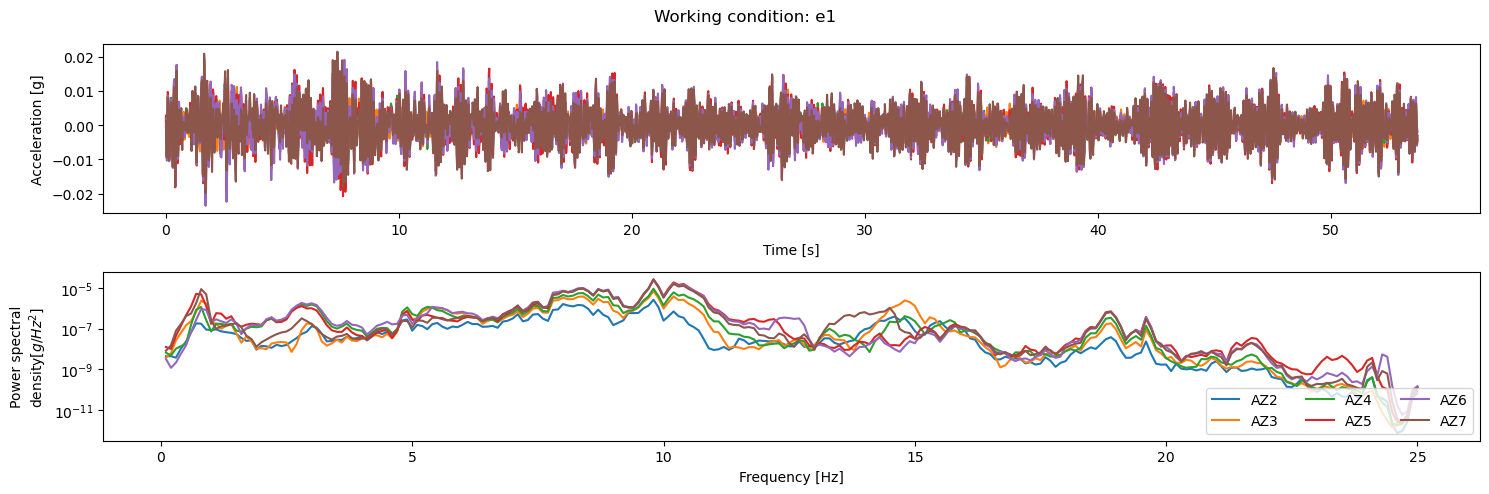

In [35]:
fs = 50 # Sample rate of data
fg,ax = plt.subplots(2,figsize=(15,5))
for channel in dat0.columns[1:]:
    if "Z" in channel:
        f,psd = welch(dat0[channel],fs=fs,nperseg=fs*10)
        ax[0].plot(dat0.index,dat0[channel],label=channel)
        ax[1].semilogy(f[1:],psd[1:],label=channel)
ax[0].set_ylabel('Acceleration [g]')
ax[1].set_ylabel('Power spectral\ndensity[$g/Hz^2$]')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend(loc=4,ncol=3)
fg.suptitle('Working condition: e1')
fg.tight_layout()

### Loading and plotting the input excitation
The input excitation, also sampled at 50Hz, from the El Centro wave is also stored within the dataframe.

The block of code below plots the input excitation for working condition *e1* against time.

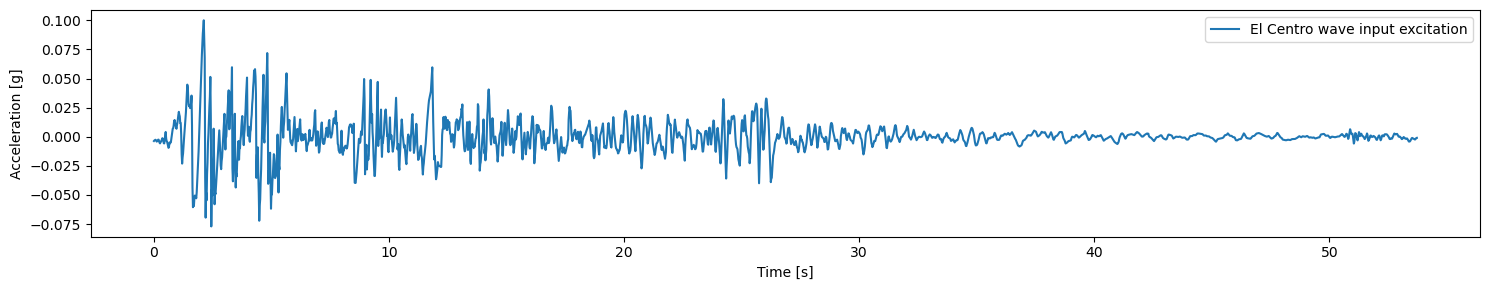

In [15]:
fg,ax = plt.subplots(figsize=(15,3))
ax.plot(dat0.index,dat0['Input force'],label='El Centro wave input excitation')
ax.set_ylabel('Acceleration [g]')
ax.set_xlabel('Time [s]')
ax.legend(loc=1)
fg.tight_layout()

The block of code below compares the input excitation with the output from accelerometer *A2* for working condition *e1*.

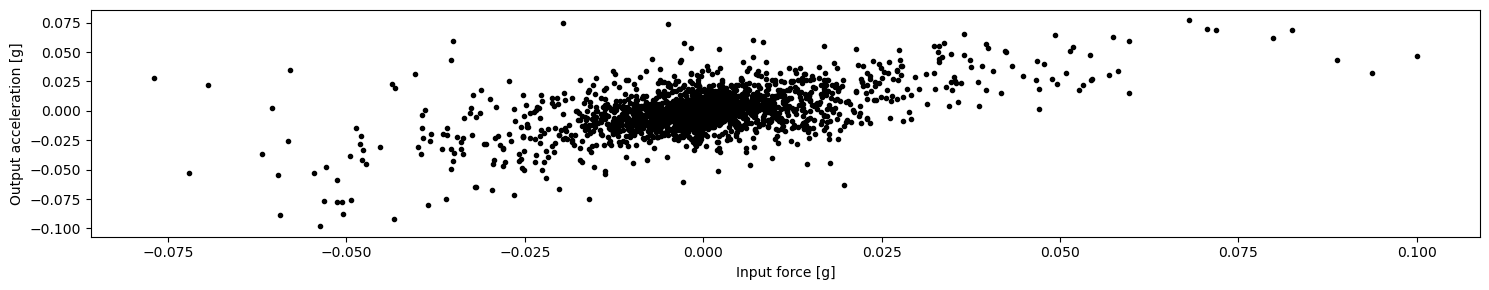

In [18]:
channel = 'A2' # Acceleromter to plot
fg,ax = plt.subplots(figsize=(15,3))
ax.plot(dat0['Input force'],dat0[channel],'k.')
ax.set_ylabel('Output acceleration [g]')
ax.set_xlabel('Input force [g]')
fg.tight_layout()